# 지하철 이용객 분석
- https://data.busan.go.kr/
- 승하차 인원정보 검색
- 일별역별시간대별승하차 파일 받기
- 최신 csv 파일로 받기

In [82]:
import pandas as pd
file_path = "dataset/일별역별시간대별승하차인원(2025년1월).csv"
data = pd.read_csv(file_path, encoding='EUC-KR')

In [83]:
columns = ['num', 'name', 'date', 'week', 'type', 'total']
time_col = [f"{i} ~ {i + 1}h" for i in range(1, 24)]
columns = columns + time_col + ['24h ~ 01h']
data.columns = columns
data = data.loc[:,:'total']

In [84]:
group = data.groupby(['num','name','date']).sum().reset_index()
# group[group['date'] == '2025-01-01']
group

,num,name,date,week,type,total
0,95,다대포해수욕장,2025-01-01,수수,승차하차,15800
1,95,다대포해수욕장,2025-01-02,목목,승차하차,8858
2,95,다대포해수욕장,2025-01-03,금금,승차하차,8279
3,95,다대포해수욕장,2025-01-04,토토,승차하차,8477
4,95,다대포해수욕장,2025-01-05,일일,승차하차,6912
...,...,...,...,...,...,...
3467,414,안평,2025-01-27,월월,승차하차,2716
3468,414,안평,2025-01-28,화화,승차하차,1987
3469,414,안평,2025-01-29,수수,승차하차,1633
3470,414,안평,2025-01-30,목목,승차하차,2037


In [96]:
gdata = group[['name','date','total']]
gdata = gdata.sort_values(by=['name'],ascending=True)
gdata

,name,date,total
1882,가야,2025-01-23,7767
1890,가야,2025-01-31,6806
1889,가야,2025-01-30,3527
1888,가야,2025-01-29,3112
1887,가야,2025-01-28,3893
...,...,...,...
2321,화명,2025-01-28,10076
2322,화명,2025-01-29,6845
2323,화명,2025-01-30,10271
2294,화명,2025-01-01,10496


In [103]:
ndata = gdata.groupby(['name']).sum().reset_index()
ndata = ndata[['name','total']]

In [105]:
Final = ndata.sort_values(by = 'total',ascending=False)
Final.head(10)

,name,total
70,서면,3626209
83,연산,1500575
61,부산역,1337149
65,사상,1230792
36,동래,1089751
72,센텀시티,1083780
88,자갈치,1070458
23,남포,1045512
64,부전,1008329
104,하단,1003733


In [112]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

d2_path = 'dataset/D2Coding-Ver1.3.2-20180524.ttf'
fm.fontManager.addfont(d2_path)
plt.rcParams["font.family"] = "D2Coding"

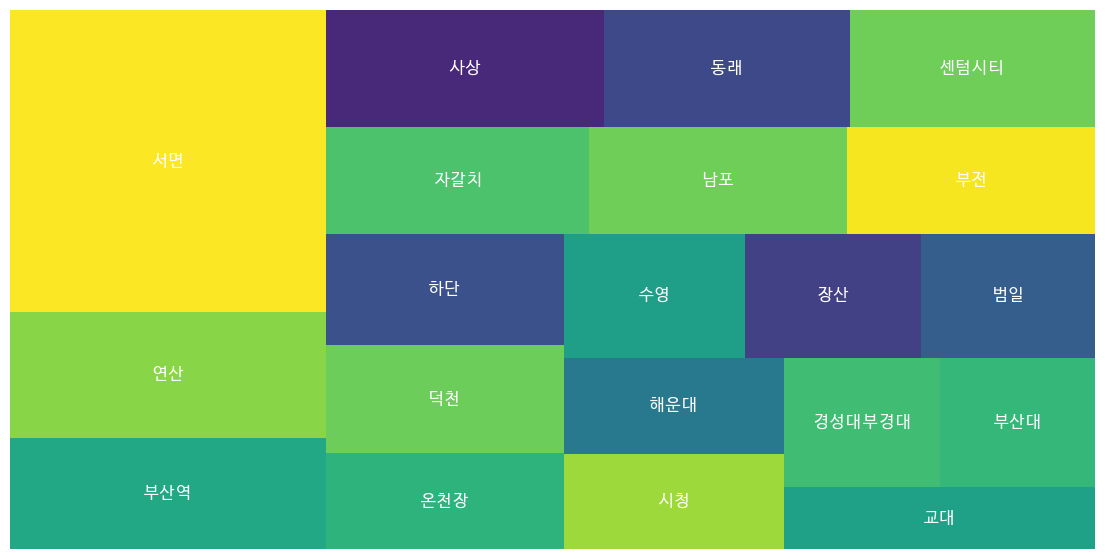

In [138]:
import squarify
plt.figure(figsize=(14,7))
squarify.plot(sizes = Final['total'].iloc[:20], label = Final['name'].iloc[:20], alpha = 1)
plt.rcParams["font.size"] = 12
plt.rcParams["text.color"] = 'white'
plt.gca().invert_yaxis()
plt.axis("off")
plt.show()

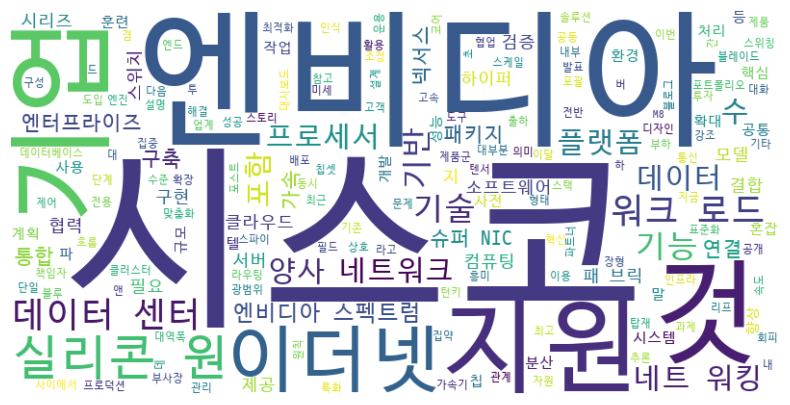

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.font_manager as fm
from konlpy.tag import Komoran

font_path = "dataset/D2Coding-Ver1.3.2-20180524.ttf"


text = """
시스코와 엔비디아가 기업의 AI 구현을 지원하기 위한 양사 간의 협업을 확대한다. 시스코의 실리콘 원(Silicon One) 기술과 엔비디아의 이더넷 네트워킹 플랫폼을 결합해 기업 데이터센터 전반에 걸쳐 AI 워크로드를 지원할 계획이다.
시스코의 부사장 겸 최고 제품 책임자인 지투 파텔은 블로그 포스트를 통해 “지금까지 AI에 대한 업계의 대화는 대부분 칩, 컴퓨팅 성능, LLM에 집중됐다. 그러나 기업이 AI 워크로드를 도입하면서, 데이터센터와 클라우드 내부, 그 사이에서 컴퓨팅 자원과 데이터를 연결하는 문제는 AI 혁신의 다음 단계가 될 것이다. 이런 의미에서 네트워크는 기업에서 AI를 성공적으로 확장하는 데 핵심이 될 것”이라고 강조했다.
양사는 시스코의 실리콘 원 기술과 엔비디아의 슈퍼NIC를 결합해 엔비디아 스펙트럼-X 이더넷 네트워킹 플랫폼에 통합할 계획이다.
시스코 실리콘 원 프로세서는 높은 네트워크 대역폭과 성능을 지원하는 전용 프로세서로, 단일 칩셋에서 라우팅 또는 스위칭용으로 맞춤화할 수 있어 네트워크 기능마다 서로 다른 프로세서 아키텍처가 필요하지 않다. 실리콘 원 시스템의 핵심은 향상된 이더넷 기능(향상된 흐름 제어, 혼잡 인식 및 회피 기능 등)을 지원하는 것이다.
참고로, 시스코는 최근 복잡한 데이터 처리 작업을 분산하고 AI 및 대규모 워크로드 처리를 위한 스위치를 구현하기 위해 AMD의 내장형 프로그래머블 DPU(Data Processing Unit)을 포함한 실리콘 원 칩을 기반으로 새로운 데이터센터 스위치 제품군을 공개했다.
슈퍼NIC는 이더넷 기반 클라우드에서 하이퍼스케일 AI 워크로드를 가속화하는 엔비디아의 새로운 네트워크 가속기이다. 엔비디아에 따르면, 슈퍼NIC는 GPU 대 GPU 통신을 위한 고속 네트워크 연결 기능을 갖추고 있으며, 컨버지드 이더넷(RoCE) 기술을 통해 RDMA(Remote Direct Memory Access)를 사용해 400Gb/s에 달하는 속도를 제공한다. 엔비디아 스펙트럼-X(Spectrum-X)는 AI 워크로드를 가속화하기 위한 엔비디아의 포괄적인 이더넷 네트워킹 플랫폼이다.
파텔은 “시스코는 엔비디아 스펙트럼 프로세서와 시스코 OS 소프트웨어를 결합한 시스템을 구축해 기업이 데이터센터에서 시스코 네트워킹과 엔비디아 기술을 동시에 표준화할 수 있도록 할 것”이라며, ”기업이 공통의 넥서스 소프트웨어 스택(NX-OS 및 넥서스 대시보드) 하에서 백엔드 연결에 특화된 엔비디아 스펙트럼 프로세서 또는 시스코 실리콘 원을 활용하면, 흥미롭고 새로운 수준의 상호 운용성을 가능해질 것”이라고 설명했다.
또한 시스코와 엔비디아는 혼잡 관리 및 부하 분산과 같은 공통 과제를 해결하기 위해 양사 포트폴리오를 아우르는 기술에도 투자해 기업이 AI 배포를 가속화할 수 있도록 지원할 것이라고 말했다.
양사는 또한 시스코 실리콘 원, 하이퍼패브릭, 넥서스, UCS 컴퓨트, 옵틱스 및 기타 시스코 기술을 이용해 엔비디아 스펙트럼-X 기반의 엔비디아 클라우드 파트너(NCP) 및 엔터프라이즈 레퍼런스 아키텍처를 만들고 검증하기 위해 협력할 것이라고 말했다.
이번 발표는 시스코와 엔비디아가 기존의 협력관계를 확대한 것이다. 양사는 데이터센터와 엣지에서 AI와 데이터 집약적 워크로드를 지원하기 위해 협력해 왔는데, 이미 시스코 UCS X-시리즈와 UCS X-시리즈 다이렉트를 포함한 시스코의 UCS 랙과 블레이드 서버에 엔비디아의 텐서 코어 GPU를 탑재했다. 통합 솔루션에는 프로덕션에 바로 사용할 수 있는 AI를 위한 사전 훈련된 모델과 개발 도구를 갖춘 엔비디아 AI 엔터프라이즈 소프트웨어가 포함되어 있다.
이달 초, 시스코는 엔터프라이즈 데이터센터 환경을 위한 UCS C845A M8 랙 서버를 출하했다고 밝혔다. 8U 랙 서버는 엔비디아의 HGX 플랫폼을 기반으로 구축됐었으며, LLM 훈련, 모델 미세 조정, 대규모 모델 추론, RAG 등의 AI 작업에 필요한 가속 컴퓨팅 기능을 제공한다.
또한 고객이 필요에 따라 데이터센터나 엣지 환경에 연결할 수 있는 사전 구성, 검증, 최적화된 인프라 패키지인 AI 팟(AI Pod)도 공동 개발하고 있다. AI 팟은 시스코의 검증된 설계 원칙을 기반으로 하며, 엔비디아 AI 엔터프라이즈가 포함되어 있다.
시스코는 시스코 넥서스 하이퍼패브릭 AI 클러스터라고 불리는 턴키 AI 패키지도 제공한다. 400G 및 800G 이더넷 패브릭을 지원하는 스파인 앤 리프 구현을 위한 시스코 6000 시리즈 스위치 형태의 통합 네트워킹 패키지이다. 이 패키지에는 블루필드-3 DPU와 슈퍼NIC를 갖춘 엔비디아 GPU, AI 팟 구축을 위한 레퍼런스 디자인, 통합 스토리지, 데이터베이스, AI 워크로드를 위해 구축된 데이터 기반 기능 엔진을 위한 광범위한 데이터 플랫폼이 포함되어 있다.
"""

komoran = Komoran()
nouns = komoran.nouns(text)
nouns_text = " ".join(nouns)

wordcloud = WordCloud(font_path= font_path, width=800, height=400,background_color="white").generate(nouns_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("word2.jpg")
plt.show()

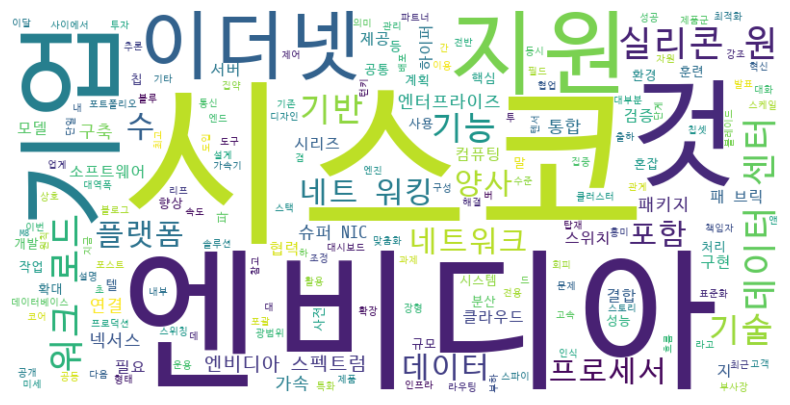

In [69]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.font_manager as fm
from konlpy.tag import Komoran

font_path = "dataset/D2Coding-Ver1.3.2-20180524.ttf"


text = """
시스코와 엔비디아가 기업의 AI 구현을 지원하기 위한 양사 간의 협업을 확대한다. 시스코의 실리콘 원(Silicon One) 기술과 엔비디아의 이더넷 네트워킹 플랫폼을 결합해 기업 데이터센터 전반에 걸쳐 AI 워크로드를 지원할 계획이다.
시스코의 부사장 겸 최고 제품 책임자인 지투 파텔은 블로그 포스트를 통해 “지금까지 AI에 대한 업계의 대화는 대부분 칩, 컴퓨팅 성능, LLM에 집중됐다. 그러나 기업이 AI 워크로드를 도입하면서, 데이터센터와 클라우드 내부, 그 사이에서 컴퓨팅 자원과 데이터를 연결하는 문제는 AI 혁신의 다음 단계가 될 것이다. 이런 의미에서 네트워크는 기업에서 AI를 성공적으로 확장하는 데 핵심이 될 것”이라고 강조했다.
양사는 시스코의 실리콘 원 기술과 엔비디아의 슈퍼NIC를 결합해 엔비디아 스펙트럼-X 이더넷 네트워킹 플랫폼에 통합할 계획이다.
시스코 실리콘 원 프로세서는 높은 네트워크 대역폭과 성능을 지원하는 전용 프로세서로, 단일 칩셋에서 라우팅 또는 스위칭용으로 맞춤화할 수 있어 네트워크 기능마다 서로 다른 프로세서 아키텍처가 필요하지 않다. 실리콘 원 시스템의 핵심은 향상된 이더넷 기능(향상된 흐름 제어, 혼잡 인식 및 회피 기능 등)을 지원하는 것이다.
참고로, 시스코는 최근 복잡한 데이터 처리 작업을 분산하고 AI 및 대규모 워크로드 처리를 위한 스위치를 구현하기 위해 AMD의 내장형 프로그래머블 DPU(Data Processing Unit)을 포함한 실리콘 원 칩을 기반으로 새로운 데이터센터 스위치 제품군을 공개했다.
슈퍼NIC는 이더넷 기반 클라우드에서 하이퍼스케일 AI 워크로드를 가속화하는 엔비디아의 새로운 네트워크 가속기이다. 엔비디아에 따르면, 슈퍼NIC는 GPU 대 GPU 통신을 위한 고속 네트워크 연결 기능을 갖추고 있으며, 컨버지드 이더넷(RoCE) 기술을 통해 RDMA(Remote Direct Memory Access)를 사용해 400Gb/s에 달하는 속도를 제공한다. 엔비디아 스펙트럼-X(Spectrum-X)는 AI 워크로드를 가속화하기 위한 엔비디아의 포괄적인 이더넷 네트워킹 플랫폼이다.
파텔은 “시스코는 엔비디아 스펙트럼 프로세서와 시스코 OS 소프트웨어를 결합한 시스템을 구축해 기업이 데이터센터에서 시스코 네트워킹과 엔비디아 기술을 동시에 표준화할 수 있도록 할 것”이라며, ”기업이 공통의 넥서스 소프트웨어 스택(NX-OS 및 넥서스 대시보드) 하에서 백엔드 연결에 특화된 엔비디아 스펙트럼 프로세서 또는 시스코 실리콘 원을 활용하면, 흥미롭고 새로운 수준의 상호 운용성을 가능해질 것”이라고 설명했다.
또한 시스코와 엔비디아는 혼잡 관리 및 부하 분산과 같은 공통 과제를 해결하기 위해 양사 포트폴리오를 아우르는 기술에도 투자해 기업이 AI 배포를 가속화할 수 있도록 지원할 것이라고 말했다.
양사는 또한 시스코 실리콘 원, 하이퍼패브릭, 넥서스, UCS 컴퓨트, 옵틱스 및 기타 시스코 기술을 이용해 엔비디아 스펙트럼-X 기반의 엔비디아 클라우드 파트너(NCP) 및 엔터프라이즈 레퍼런스 아키텍처를 만들고 검증하기 위해 협력할 것이라고 말했다.
이번 발표는 시스코와 엔비디아가 기존의 협력관계를 확대한 것이다. 양사는 데이터센터와 엣지에서 AI와 데이터 집약적 워크로드를 지원하기 위해 협력해 왔는데, 이미 시스코 UCS X-시리즈와 UCS X-시리즈 다이렉트를 포함한 시스코의 UCS 랙과 블레이드 서버에 엔비디아의 텐서 코어 GPU를 탑재했다. 통합 솔루션에는 프로덕션에 바로 사용할 수 있는 AI를 위한 사전 훈련된 모델과 개발 도구를 갖춘 엔비디아 AI 엔터프라이즈 소프트웨어가 포함되어 있다.
이달 초, 시스코는 엔터프라이즈 데이터센터 환경을 위한 UCS C845A M8 랙 서버를 출하했다고 밝혔다. 8U 랙 서버는 엔비디아의 HGX 플랫폼을 기반으로 구축됐었으며, LLM 훈련, 모델 미세 조정, 대규모 모델 추론, RAG 등의 AI 작업에 필요한 가속 컴퓨팅 기능을 제공한다.
또한 고객이 필요에 따라 데이터센터나 엣지 환경에 연결할 수 있는 사전 구성, 검증, 최적화된 인프라 패키지인 AI 팟(AI Pod)도 공동 개발하고 있다. AI 팟은 시스코의 검증된 설계 원칙을 기반으로 하며, 엔비디아 AI 엔터프라이즈가 포함되어 있다.
시스코는 시스코 넥서스 하이퍼패브릭 AI 클러스터라고 불리는 턴키 AI 패키지도 제공한다. 400G 및 800G 이더넷 패브릭을 지원하는 스파인 앤 리프 구현을 위한 시스코 6000 시리즈 스위치 형태의 통합 네트워킹 패키지이다. 이 패키지에는 블루필드-3 DPU와 슈퍼NIC를 갖춘 엔비디아 GPU, AI 팟 구축을 위한 레퍼런스 디자인, 통합 스토리지, 데이터베이스, AI 워크로드를 위해 구축된 데이터 기반 기능 엔진을 위한 광범위한 데이터 플랫폼이 포함되어 있다.
"""

komoran = Komoran()
nouns = komoran.nouns(text)
nouns_text = " ".join(nouns)

wordcloud = WordCloud(font_path= font_path, width=800, height=400,background_color="white").generate(nouns_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("word2.jpg")
plt.show()

In [70]:
from collections import Counter

word_counts = Counter(nouns)
print(word_counts)

Counter({'시스코': 21, '엔비디아': 20, '데이터': 11, '것': 8, '기업': 7, '지원': 7, '실리콘': 7, '원': 7, '이더넷': 7, '센터': 7, '워크': 7, '로드': 7, '기술': 6, '기능': 6, '기반': 6, '양사': 5, '네트': 5, '워킹': 5, '플랫폼': 5, '네트워크': 5, '스펙트럼': 5, '프로세서': 5, '수': 5, '포함': 5, '연결': 4, '슈퍼': 4, 'NIC': 4, '통합': 4, '가속': 4, '구축': 4, '넥서스': 4, '엔터프라이즈': 4, '패키지': 4, '구현': 3, '결합': 3, '지': 3, '컴퓨팅': 3, '클라우드': 3, '필요': 3, '스위치': 3, '하이퍼': 3, '제공': 3, '소프트웨어': 3, '패': 3, '브릭': 3, '검증': 3, '협력': 3, '시리즈': 3, '모델': 3, '확대': 2, '계획': 2, '파': 2, '텔': 2, '칩': 2, '성능': 2, '핵심': 2, '시스템': 2, '향상': 2, '혼잡': 2, '등': 2, '작업': 2, '분산': 2, '규모': 2, '사용': 2, '공통': 2, '말': 2, '사전': 2, '훈련': 2, '개발': 2, '환경': 2, '서버': 2, '간': 1, '협업': 1, '전반': 1, '부사장': 1, '겸': 1, '최고': 1, '제품': 1, '책임자': 1, '투': 1, '블로그': 1, '포스트': 1, '지금': 1, '업계': 1, '대화': 1, '대부분': 1, '집중': 1, '도입': 1, '내부': 1, '사이에서': 1, '자원': 1, '문제': 1, '혁신': 1, '다음': 1, '단계': 1, '의미': 1, '성공': 1, '확장': 1, '데': 1, '강조': 1, '대역폭': 1, '전용': 1, '단일': 1, '칩셋': 1, '라우팅': 1, '스위칭': 1, '맞춤화': 1

In [72]:
from collections import Counter

text = """
"""

komoran = Komoran()
nouns = komoran.nouns(text)
nouns_text = " ".join(nouns)
word_counts = Counter(nouns)


def 글자수추출기(text):
    komoran = Komoran()
    nouns = komoran.nouns(text)
    
    count_dict = {}
    
    for i ,n in enumerate(nouns):
        if n not in count_dict.keys():
            count_dict[n] = 1
        else:
            count_dict[n] = count_dict[n] + 1
    
    sort_dict = dict(sorted(count_dict.items(), key = lambda item : item[1], reverse=True))
    print(sort_dict)

print(word_counts)
글자수추출기(text)

Counter({'시스코': 21, '엔비디아': 20, '데이터': 11, '것': 8, '기업': 7, '지원': 7, '실리콘': 7, '원': 7, '이더넷': 7, '센터': 7, '워크': 7, '로드': 7, '기술': 6, '기능': 6, '기반': 6, '양사': 5, '네트': 5, '워킹': 5, '플랫폼': 5, '네트워크': 5, '스펙트럼': 5, '프로세서': 5, '수': 5, '포함': 5, '연결': 4, '슈퍼': 4, 'NIC': 4, '통합': 4, '가속': 4, '구축': 4, '넥서스': 4, '엔터프라이즈': 4, '패키지': 4, '구현': 3, '결합': 3, '지': 3, '컴퓨팅': 3, '클라우드': 3, '필요': 3, '스위치': 3, '하이퍼': 3, '제공': 3, '소프트웨어': 3, '패': 3, '브릭': 3, '검증': 3, '협력': 3, '시리즈': 3, '모델': 3, '확대': 2, '계획': 2, '파': 2, '텔': 2, '칩': 2, '성능': 2, '핵심': 2, '시스템': 2, '향상': 2, '혼잡': 2, '등': 2, '작업': 2, '분산': 2, '규모': 2, '사용': 2, '공통': 2, '말': 2, '사전': 2, '훈련': 2, '개발': 2, '환경': 2, '서버': 2, '간': 1, '협업': 1, '전반': 1, '부사장': 1, '겸': 1, '최고': 1, '제품': 1, '책임자': 1, '투': 1, '블로그': 1, '포스트': 1, '지금': 1, '업계': 1, '대화': 1, '대부분': 1, '집중': 1, '도입': 1, '내부': 1, '사이에서': 1, '자원': 1, '문제': 1, '혁신': 1, '다음': 1, '단계': 1, '의미': 1, '성공': 1, '확장': 1, '데': 1, '강조': 1, '대역폭': 1, '전용': 1, '단일': 1, '칩셋': 1, '라우팅': 1, '스위칭': 1, '맞춤화': 1

In [97]:
komoran = Komoran()
nouns = komoran.nouns(text)

count_dict = {}

for i ,n in enumerate(nouns):
    if n not in count_dict.keys():
        count_dict[n] = 1
    else:
        count_dict[n] = count_dict[n] + 1

sort = sorted([t[1] for t in list(count_dict.items())],reverse=True)
sort_dict = list(count_dict.items())
# sort_dict

lambda i : i[1], sort_dict

(<function __main__.<lambda>(i)>,
 [('시스코', 21),
  ('엔비디아', 20),
  ('기업', 7),
  ('구현', 3),
  ('지원', 7),
  ('양사', 5),
  ('간', 1),
  ('협업', 1),
  ('확대', 2),
  ('실리콘', 7),
  ('원', 7),
  ('기술', 6),
  ('이더넷', 7),
  ('네트', 5),
  ('워킹', 5),
  ('플랫폼', 5),
  ('결합', 3),
  ('데이터', 11),
  ('센터', 7),
  ('전반', 1),
  ('워크', 7),
  ('로드', 7),
  ('계획', 2),
  ('부사장', 1),
  ('겸', 1),
  ('최고', 1),
  ('제품', 1),
  ('책임자', 1),
  ('지', 3),
  ('투', 1),
  ('파', 2),
  ('텔', 2),
  ('블로그', 1),
  ('포스트', 1),
  ('지금', 1),
  ('업계', 1),
  ('대화', 1),
  ('대부분', 1),
  ('칩', 2),
  ('컴퓨팅', 3),
  ('성능', 2),
  ('집중', 1),
  ('도입', 1),
  ('클라우드', 3),
  ('내부', 1),
  ('사이에서', 1),
  ('자원', 1),
  ('연결', 4),
  ('문제', 1),
  ('혁신', 1),
  ('다음', 1),
  ('단계', 1),
  ('것', 8),
  ('의미', 1),
  ('네트워크', 5),
  ('성공', 1),
  ('확장', 1),
  ('데', 1),
  ('핵심', 2),
  ('강조', 1),
  ('슈퍼', 4),
  ('NIC', 4),
  ('스펙트럼', 5),
  ('통합', 4),
  ('프로세서', 5),
  ('대역폭', 1),
  ('전용', 1),
  ('단일', 1),
  ('칩셋', 1),
  ('라우팅', 1),
  ('스위칭', 1),
  ('맞춤화', 1),
  ('수', 5

# 온라인 쇼핑몰 매출관계 분석

- 국가통계포털
- 온라인쇼핑몰 판매매체별 상품군별 거래액
- 합계 등을 제외하고 선택(전기전자통신 2020년 전후로 분리되어서 미리 합침)
- 행렬 전환

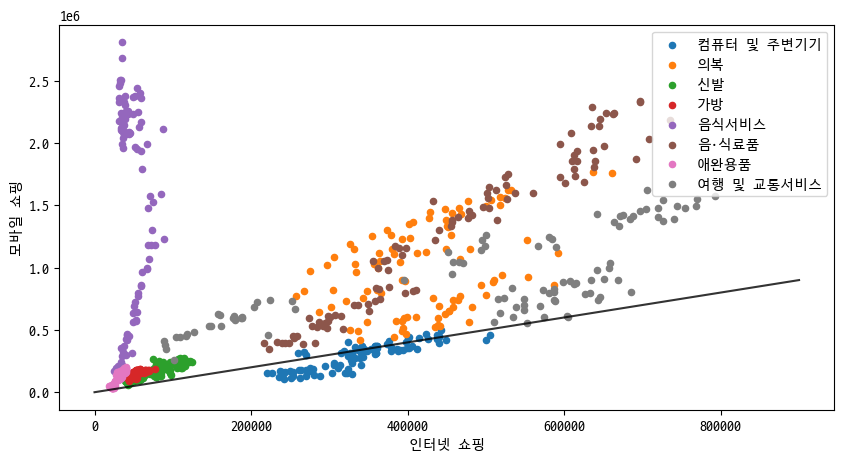

In [139]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import pandas as pd
from datetime import datetime

d2_path = "dataset/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(path=d2_path)
matplotlib.rcParams["font.family"] = "D2Coding"

file_path = "dataset/온라인쇼핑몰_판매매체별_상품군별거래액.csv"
ori = pd.read_csv(file_path, encoding='EUC-KR')
ori.columns = ["category", "date", "internet", "mobile"]
ori['date'] = ori['date'].map(lambda x : x.rstrip(' p)'))

ori['date'] = pd.to_datetime(ori["date"], format='%Y.%m')

ex1_data = ori.copy()

obj = ['컴퓨터 및 주변기기','의복','신발','가방','음식서비스','음·식료품','애완용품','여행 및 교통서비스']
ex1_data = ex1_data[ex1_data['category'].isin(obj)]
ex1_data.sample(20)

fig, ax = plt.subplots(figsize = (10, 5))

for o in obj:
    category_data = ex1_data[ex1_data['category'] == o]
    x_data = category_data['internet']
    y_data = category_data['mobile']
    ax.scatter(x_data, y_data, s = 20, label = o)

ax.set_xlabel('인터넷 쇼핑')
ax.set_ylabel('모바일 쇼핑')
ax.legend(loc="best")
ax.plot([0,900000],[0,900000], 'k-', alpha = 0.8)
plt.show()


# 교통사고 유형별 발생 분석
- 공공 데이터 교통사고 유형, 검색어 : 전국 교통사고 다발 지역

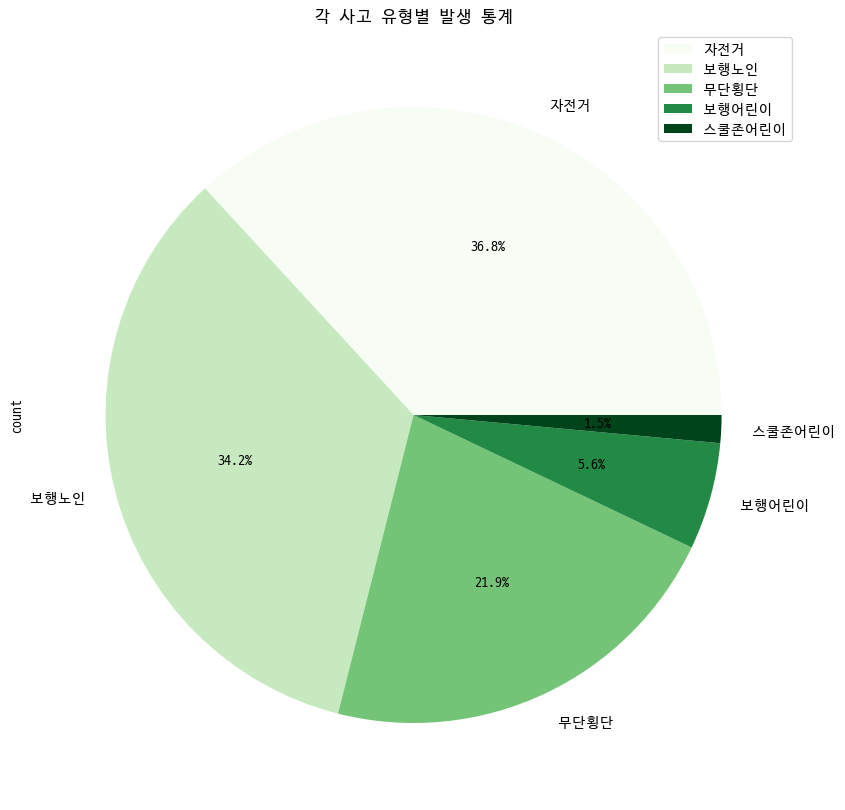

['스쿨존어린이', '무단횡단', '보행어린이', '보행노인', '자전거']


<Figure size 640x480 with 0 Axes>

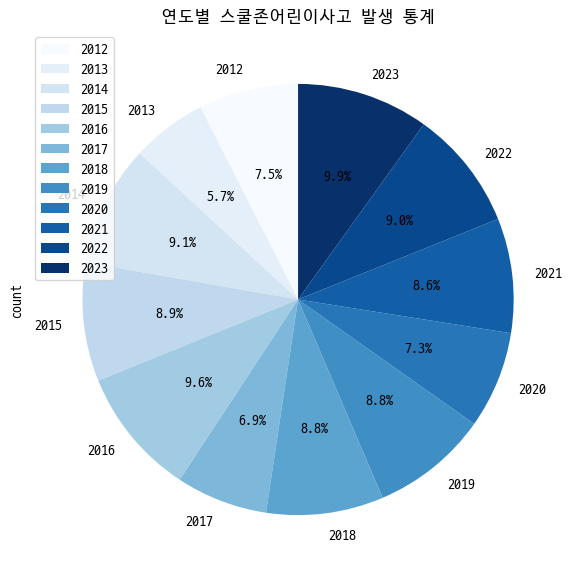

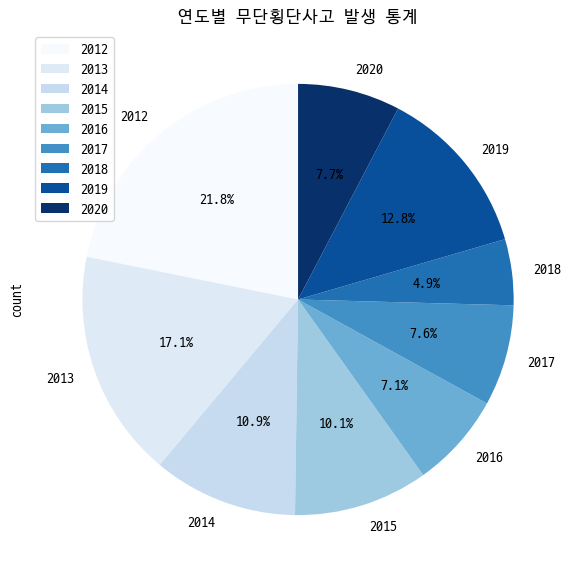

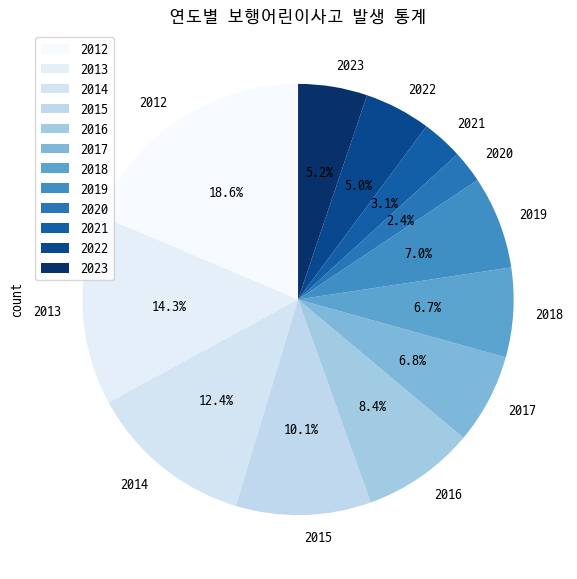

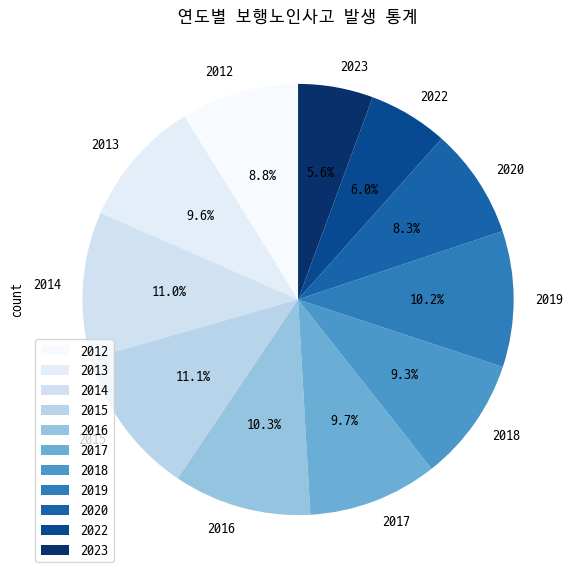

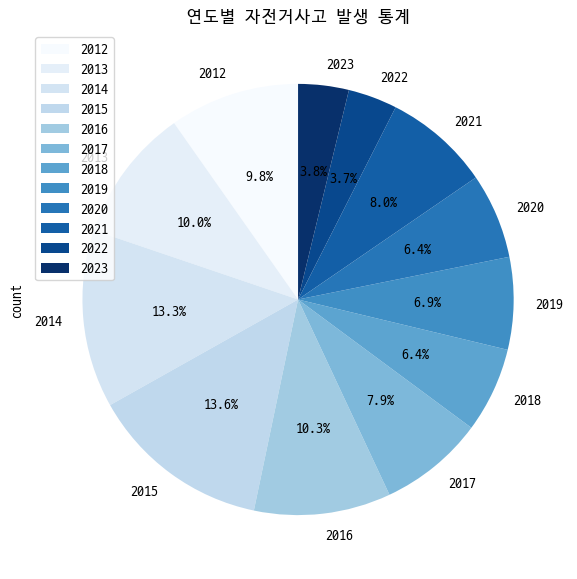

In [30]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import pandas as pd

d2_path = "dataset/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(path=d2_path)
matplotlib.rcParams["font.family"] = "D2Coding"

file_path = "dataset/전국교통사고다발지역표준데이터.csv"
ori = pd.read_csv(file_path, encoding = 'EUC_KR')
ori.head()

ori_data = ori.groupby('사고유형구분')['사고건수'].sum().reset_index(name = "count")
ori_data = ori_data.sort_values('count',ascending=False)
ori_data = ori_data.rename(columns={'사고유형구분':'type'})
ori_data

ori_data.plot(kind = 'pie', y = 'count', labels = ori_data['type'], title = "각 사고 유형별 발생 통계", cmap = matplotlib.cm.Greens, autopct = '%2.1f%%', figsize = (10,10), startangle = 0)
plt.show()
plt.savefig('chart/accident.jpg')

ex_data = ori.copy()
ex_data = ex_data.rename(columns = {'사고유형구분':'type'})
ex2_data = list(set(ex_data['type']))
print(ex2_data)
data_list = []
for e in ex2_data:
    data_list.append(ex_data[ex_data['type'] == e])
# print(data_list)

total_list = []
for d in data_list:
    result = d.groupby('사고연도')['사고건수'].sum().reset_index(name = 'count')
    total_list.append(result)

for e in range(len(ex2_data)):
    total_list[e].plot(
        kind = 'pie',
        y = 'count',
        labels = total_list[e]['사고연도'],
        figsize = (7,7),
        autopct = '%.1f%%',
        title = '연도별 ' + ex2_data[e] + '사고 발생 통계',
        cmap = matplotlib.cm.Blues,
        startangle = 90
    )
    plt.savefig(f'./chart/accident{e}.jpg')
    plt.show()

from IPython.display import display, HTML

html = f"""
<div style = "display: flex; flex-wrap: wrap; gap: 20px; width: 100%; padding: 20px;">"""
for i in range(len(ex2_data)):
    html += f"""<img src = "chart/accident{i}.jpg">"""
html += """</div>"""
display(HTML(html))

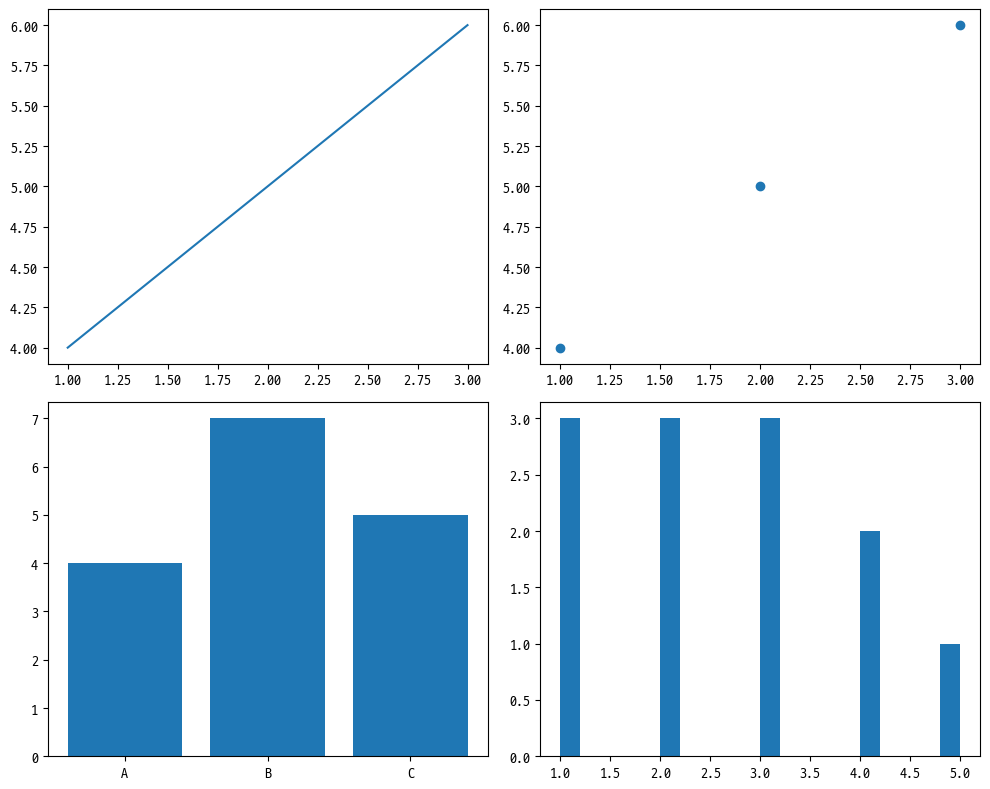

In [42]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize = (10, 8)) # 2x2 서브플롯 생성

ax[0,0].plot([1,2,3],[4,5,6])
ax[0,1].scatter([1,2,3],[4,5,6])
ax[1,0].bar(['A','B','C'],[4,7,5])
ax[1,1].hist([1,1,2,2,3,3,4,4,5,1,2,3],bins = 20)

plt.tight_layout()
plt.show()

# 판다스 심화

In [5]:
import numpy as np
import pandas as pd

print("DataFrame: ")
data = {"col1":[2,1,9,8,7,4],"col2":['A','A','B',np.nan,'D','C'],"col3":[0,1,9,4,2,3]}
index = [1,3,2,5,0,4]
df = pd.DataFrame(data, index=index)
df

DataFrame: 


,col1,col2,col3
1,2,A,0
3,1,A,1
2,9,B,9
5,8,NaN,4
0,7,D,2
4,4,C,3


In [6]:
df = df.sort_index(axis=0)
df

,col1,col2,col3
0,7,D,2
1,2,A,0
2,9,B,9
3,1,A,1
4,4,C,3
5,8,NaN,4


In [7]:
df = df.sort_index(axis=1, ascending=False)
df

,col3,col2,col1
0,2,D,7
1,0,A,2
2,9,B,9
3,1,A,1
4,3,C,4
5,4,NaN,8


In [8]:
sorted_df1 = df.sort_values('col1',ascending=True)
sorted_df1

,col3,col2,col1
3,1,A,1
1,0,A,2
4,3,C,4
0,2,D,7
5,4,NaN,8
2,9,B,9


In [9]:
sorted_df2 = df.sort_values(['col2','col1'],ascending=[True, False])
sorted_df2

,col3,col2,col1
1,0,A,2
3,1,A,1
2,9,B,9
4,3,C,4
0,2,D,7
5,4,NaN,8


In [ ]:
x = np.random.randint(1,5,size = (10,5))
x

x = np.random.rand(10,5)
x

x = np.random.normal(5,3,(10,5)) #평균5, 표준편차3
x, np.mean(x), np.std(x), x.min(), x.max()

x = np.random.randn(10,5)
x, np.mean(x), np.std(x), x.min(), x.max()

x = np.array([7,4,1,5,8,0,8,8,2,7,0,7,4,0,5,6,7])
len(x), np.count_nonzero(x)

print(np.percentile(x,0))
print(np.percentile(x,25))
print(np.percentile(x,50))
print(np.percentile(x,75))
print(np.percentile(x,100))

In [19]:
import numpy as np
import pandas as pd

data = {
    'Korean' : [50,60,70,30],
    'Math' : [30, np.nan, 40, 20]
}

df = pd.DataFrame(data,['a','b','c','d'])
print(df.index)
print(df.columns)
df

Index(['a', 'b', 'c', 'd'], dtype='object')
Index(['Korean', 'Math'], dtype='object')


,Korean,Math
a,50,30.0
b,60,NaN
c,70,40.0
d,30,20.0


In [20]:
df.count(axis = 0) #행의 갯수

Korean    4
Math      3
dtype: int64

In [21]:
df.count(axis = 1) #열의 갯수

a    2
b    1
c    2
d    2
dtype: int64

In [24]:
print(df.max())
print(df.max(axis=1))
print(df.min())
print(df.min(axis=1))
print(df.sum())
print(df.sum(axis=1))
print(df.mean())
print(df.mean(axis=1, skipna=False))

Korean    70.0
Math      40.0
dtype: float64
a    50.0
b    60.0
c    70.0
d    30.0
dtype: float64
Korean    30.0
Math      20.0
dtype: float64
a    30.0
b    60.0
c    40.0
d    20.0
dtype: float64
Korean    210.0
Math       90.0
dtype: float64
a     80.0
b     60.0
c    110.0
d     50.0
dtype: float64
Korean    52.5
Math      30.0
dtype: float64
a    40.0
b     NaN
c    55.0
d    25.0
dtype: float64


In [26]:
avg = df['Math'].mean()
df['Math'] = df['Math'].fillna(avg)
df

,Korean,Math
a,50,30.0
b,60,30.0
c,70,40.0
d,30,20.0


In [37]:
import numpy as np
import pandas as pd

df = pd.DataFrame({
    'key': ['A','B','C','A','B','C'],
    'data1': [1,2,3,1,2,3],
    'data2': [4,4,6,0,6,1],
    # 'data3': ['안녕','a','b','하세요','pple','anana']
})
df

,key,data1,data2
0,A,1,4
1,B,2,4
2,C,3,6
3,A,1,0
4,B,2,6
5,C,3,1


In [38]:
df.groupby('key').sum()

,data1,data2
key,,
A,2,4
B,4,10
C,6,7


In [39]:
df.groupby(['key','data1']).sum()

,,data2
key,data1,
A,1,4
B,2,10
C,3,7


In [41]:
df.groupby('key').aggregate(['min','median','max'])

data1            data2           
      min median max   min median max
key                                  
A       1    1.0   1     0    2.0   4
B       2    2.0   2     4    5.0   6
C       3    3.0   3     1    3.5   6

In [42]:
df.groupby('key').aggregate({'data1':'max','data2':'sum'})

,data1,data2
key,,
A,1,4
B,2,10
C,3,7
